# Predicting Breast Cancer - Logistic Regression

# 0. Introduction
---

This notebook was inspired by [Mehgan Risdal's kernel](https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic) on the Titanic data, [Pedro Marcelino's kernel](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python) on the Housing Prices data, and a very similar model by Mike M. Lee, also for breast cancer diagnosis prediction.

The contents of this notebook will follow the outline below:

[1. The Data](#the_data) - *Exploratory Data Analysis*

[2. The Variables](#the_variables) - *Feature Selection*

[3. The Model](#the_model) - *Building a Logistic Regression Model*

[4. The Prediction](#the_prediction) - *Making Predictions with the Model*

[5. Alternative Models](#alternative_models) - *Fit our data into a different set of models*


<a id='the_data'></a>
# 1. The Data
---
*Data sourced from [UCI ML repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)*

### Attribute Information:

* **id** 
* **diagnosis**: M = malignant, B = benign

*Columns 3 to 32* 

Ten real-valued features are computed for each cell nucleus: 

* **radius**: distances from center to points on the perimeter 
* **texture**: standard deviation of gray-scale values
* **perimeter** 
* **area** 
* **smoothness**: local variation in radius lengths 
* **compactness**: perimeter^2 / area - 1.0 
* **concavity**: severity of concave portions of the contour
* **concave points**: number of concave portions of the contour
* **symmetry** 
* **fractal dimension**: "coastline approximation" - 1

The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

---

In [1]:
# import dependencies
# data cleaning and manipulation 

import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.preprocessing import StandardScaler

import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split

# import extra models to evaluate vs logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import statsmodels.api as sm
import statsmodels.formula.api as smf

# check for Model Accuracy, errors and its validations

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.svm import SVC
from sklearn import metrics

# Fine tuning our models based on best performing parameters

from  sklearn.model_selection import GridSearchCV


# initialize some package settings
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)

%matplotlib inline

In [2]:
# read in the data and check the first 5 rows
df = pd.read_csv('data/data.csv', index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The last column, **Unnamed:32**, seems like it has a whole bunch of missing values. Let's quickly check for any missing values for other columns as well.

In [3]:
# general summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

It looks like our data does not contain any missing values, except for our suspect column **Unnamed: 32**, which is full of missing values. Let's go ahead and remove this column entirely. After that, let's check for the data type of each column.

In [4]:
# remove the 'Unnamed: 32' column
df = df.drop('Unnamed: 32', axis=1)

In [5]:
# check the data type of each column
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

Our response variable, **diagnosis**, is categorical and has two classes,  'B' (Benign) and 'M' (Malignant). All explanatory variables are numerical, so we can skip data type conversion.

Let's now take a closer look at our response variable, since it is the main focus of our analysis. We begin by checking out the distribution of its classes.

Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212

% of cells labeled Benign 62.74 %
% of cells labeled Malignant 37.26 %


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


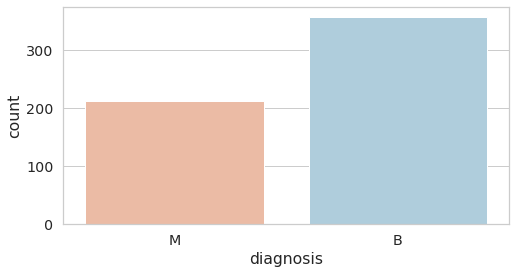

In [6]:
# visualize distribution of classes 
plt.figure(figsize=(8, 4))
sns.countplot(df['diagnosis'], palette='RdBu')

# count number of obvs in each class
benign, malignant = df['diagnosis'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('')
print('% of cells labeled Benign', round(benign / len(df) * 100, 2), '%')
print('% of cells labeled Malignant', round(malignant / len(df) * 100, 2), '%')

Out of the 569 observations, 357 (or 62.7%) have been labeled malignant, while the rest 212 (or 37.3%) have been labeled benign. Later when we develop a predictive model and test it on unseen data, we should expect to see a similar proportion of labels.

Although our dataset has 30 columns excluding the **id** and the **diagnosis** columns, they are all in fact very closely related since they all contain information on the same 10 key attributes but only differ in terms of their perspectives (i.e., the mean, standard errors, and the mean of the three largest values denoted as "worst"). 

In this sense, we could attempt to dig out some quick insights by analyzing the data in only one of the three perspectives. For instance, we could choose to check out the relationship between the 10 key attributes and the **diagnosis** variable by only choosing the "mean" columns.

Let's quickly scan for any interesting patterns between our 10 "mean" columns and the response variable by generating a scatter plot matrix as shown below:

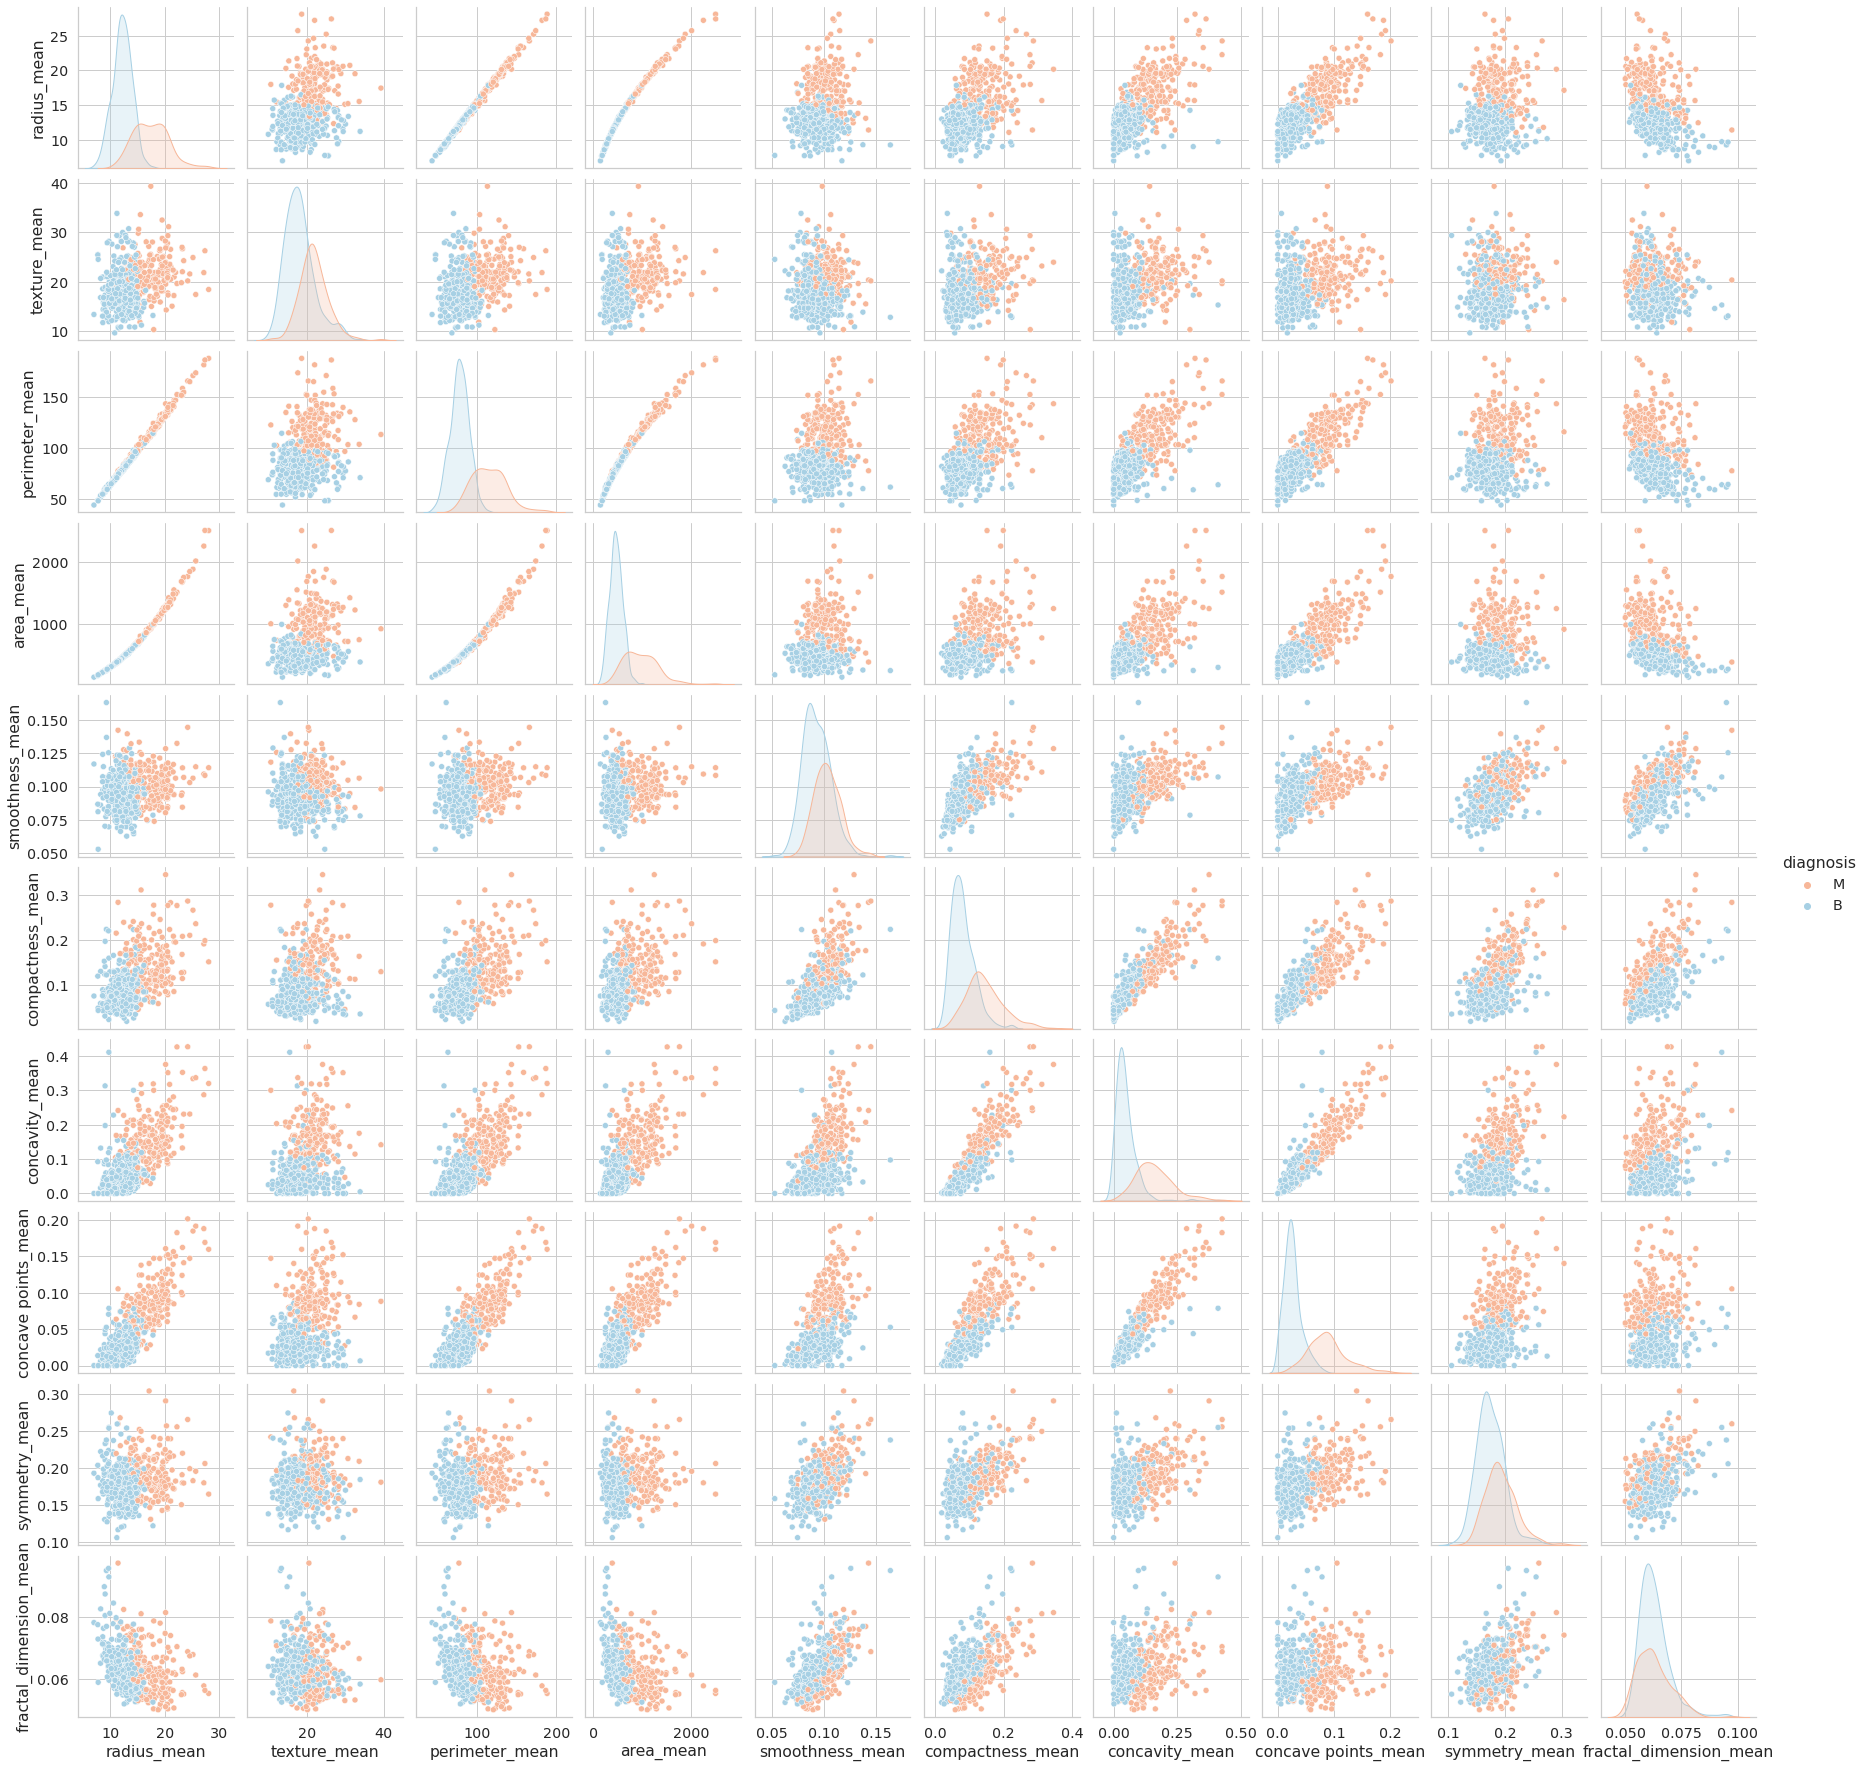

In [7]:
# generate a scatter plot matrix with the "mean" columns
cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.pairplot(data=df[cols], hue='diagnosis', palette='RdBu')

There are some interesting patterns visible. For instance, the almost perfectly linear patterns between the **radius**, **perimeter** and **area** attributes are hinting at the presence of a correlation between these variables. Another set of variables that possibly imply correlation are the **concavity**, **concave_points** and **compactness**. 

<a id='the_variables'></a>
# 2. The Variables
---
As said earlier, let's take a look at the correlations between our variables. This time however, we will create a correlation matrix with all variables (i.e., the "mean" columns, the "standard errors" columns, as well as the "worst" columns).

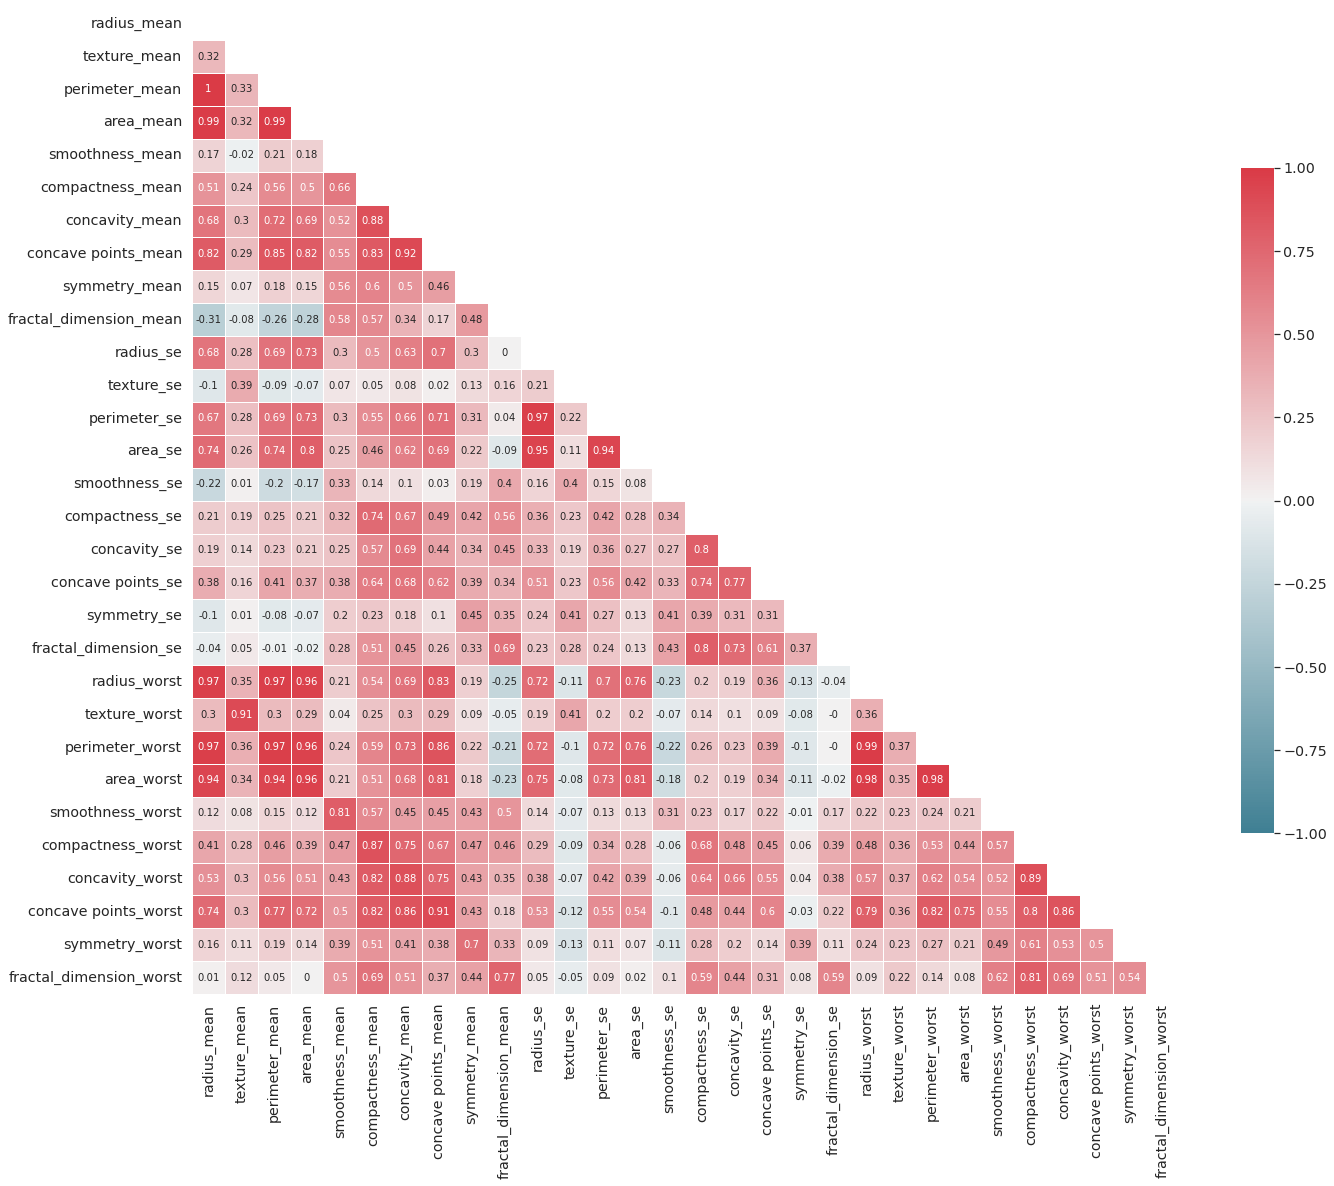

In [8]:
# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

Looking at the matrix, we can immediately verify the presence of correlation between some of our variables. For instance, the **radius_mean** column has a correlation of 1 and 0.99 with **perimeter_mean** and **area_mean** columns, respectively. This is probably because the three columns essentially contain the same information, which is the physical size of the observation (the cell). Therefore we should only pick one of the three columns when we go into further analysis. 

Another place where correlation is apparent is between the "mean" columns and the "worst" column. For instance, the **radius_mean** column has a correlation of 0.97 with the **radius_worst** column. In fact, each of the 10 key attributes display very high (from 0.7 up to 0.97) correlations between its "mean" and "worst" columns. This is somewhat inevitable, because the "worst" columns are essentially just a subset of the "mean" columns; the "worst" columns are also the "mean" of some values (the three largest values among all observations). Therefore, I think we should discard the "worst" columns from our analysis and only focus on the "mean" columns. 

In short, we will drop all "worst" columns from our dataset, then pick only one of the three attributes that describe the size of cells. But which one should be pick?

Let's quickly go back to 6th grade and review some geometry. If we think of a cell as roughly taking a form of a circle, then the formula for its radius is, well, its radius,  *r*. The formulae for its perimeter and area are then **\\(2\pi r\\) ** and **\\(\pi r^2\\) **, respectively. As we can see, a cell's **radius** is the basic building block of its size. Therefore, I think it is reasonable to choose **radius** as our attribute to represent the size of a cell. 

Similarly, it seems like there is correlation between the attributes **compactness**, **concavity**, and **concave points**. Just like what we did with the size attributes, we should pick only one of these three attributes that contain information on the shape of the cell. I think **compactness** is an attribute name that is straightforward, so I will remove the other two attributes. 

We will now go head and drop all unnecessary columns. 

In [9]:
# first, drop all "worst" columns
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']
df = df.drop(cols, axis=1)

# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
df = df.drop(cols, axis=1)

# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
df = df.drop(cols, axis=1)

# verify remaining columns
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

Are we all set now?

Let's take a look at the correlation matrix once again, this time created with our trimmed-down set of variables.

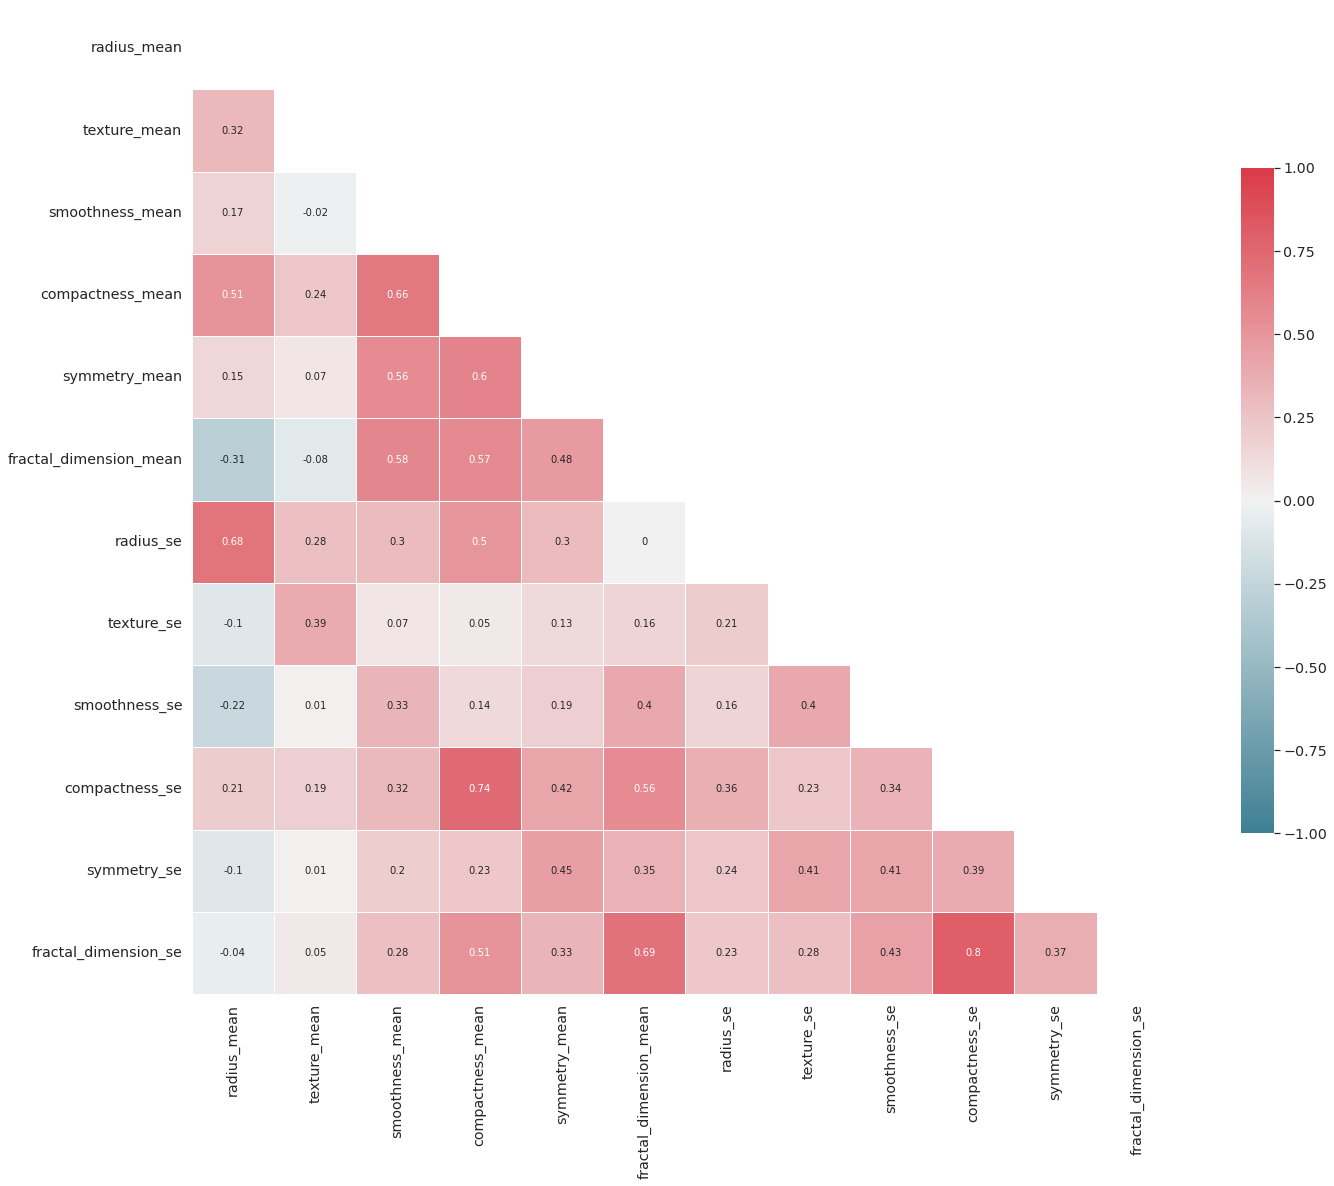

In [10]:
# Draw the heatmap again, with the new correlation matrix
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

Looks great! Now let's move on to our model.

<a id='the_model'></a>
# 3. The Model
___

It's finally time to develop our model! We will start by first splitting our dataset into two parts; one as a training set for the model, and the other as a test set to validate the predictions that the model will make.  We will set the test size to 0.3; i.e., 70% of the data will be assigned to the training set, and the remaining 30% will be used as a test set. In order to obtain consistent results, we will set the random state parameter to a value of 40.

In [11]:
print(df)

         diagnosis  radius_mean  texture_mean  smoothness_mean  \
id                                                               
842302           M        17.99         10.38          0.11840   
842517           M        20.57         17.77          0.08474   
84300903         M        19.69         21.25          0.10960   
84348301         M        11.42         20.38          0.14250   
84358402         M        20.29         14.34          0.10030   
...            ...          ...           ...              ...   
926424           M        21.56         22.39          0.11100   
926682           M        20.13         28.25          0.09780   
926954           M        16.60         28.08          0.08455   
927241           M        20.60         29.33          0.11780   
92751            B         7.76         24.54          0.05263   

          compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
id                                                           

In [12]:
# Split the data into training and testing sets
X = df
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

Now that we have split our data into appropriate sets, let's write down the formula to be used for the `logistic regression`.

In [13]:
# Create a string for the formula
cols = df.columns.drop('diagnosis')
formula = 'diagnosis ~ ' + ' + '.join(cols)
print(formula, '\n')

diagnosis ~ radius_mean + texture_mean + smoothness_mean + compactness_mean + symmetry_mean + fractal_dimension_mean + radius_se + texture_se + smoothness_se + compactness_se + symmetry_se + fractal_dimension_se 



The formula includes all of the variables that were finally selected at the end of the previous section. We will now run the `logistic regression` with this formula and take a look at the results.

In [14]:
# Run the model and report the results
model = smf.glm(formula=formula, data=X_train, family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())

                        Generalized Linear Model Regression Results                         
Dep. Variable:     ['diagnosis[B]', 'diagnosis[M]']   No. Observations:                  398
Model:                                          GLM   Df Residuals:                      385
Model Family:                              Binomial   Df Model:                           12
Link Function:                                Logit   Scale:                          1.0000
Method:                                        IRLS   Log-Likelihood:                -55.340
Date:                              Mon, 12 Dec 2022   Deviance:                       110.68
Time:                                      23:07:30   Pearson chi2:                     125.
No. Iterations:                                   9   Pseudo R-squ. (CS):             0.6539
Covariance Type:                          nonrobust                                         
                             coef    std err          z      P>|z|    

<a id='the_prediction'></a>
# 4. The Prediction
___

In the previous section, we have successfully developed a logistic regression model. This model can take some unlabeled data and effectively assign each observation a probability ranging from 0 to 1. However, for us to evaluate whether the predictions are accurate, the predictions must be encoded so that each instance can be compared directly with the labels in the test data. So, instead of numbers between 0 or 1, the predictions should show "M" or "B", denoting malignant and benign respectively. In our model, a probability of 1 corresponds to the "Benign" class, whereas a probability of 0 corresponds to the "Malignant" class. Therefore, we can apply a threshhold value of 0.5 to our predictions, assigning all values closer to 0 a label of "M" and assigning all values closer to 1 a label of "B". 

Let's go through this step-by-step.

In [15]:
# predict the test data and show the first 5 predictions
predictions = logistic_fit.predict(X_test)
predictions[1:6]

id
848406      0.324251
907915      0.996906
911201      0.964710
84799002    0.000544
8911164     0.838719
dtype: float64

In [16]:
# Note how the values are numerical. 
# Convert these probabilities into nominal values and check the first 5 predictions again.
predictions_nominal = [ "M" if x < 0.5 else "B" for x in predictions]
predictions_nominal[1:6]

['M', 'B', 'B', 'M', 'B']

We can confirm that probabilities closer to 0 have been labeled as "M", while the ones closer to 1 have been labeled as "B". Now we are able to evaluate the accuracy of our predictions by checking out the classification report and the confusion matrix.

In [17]:
print(classification_report(y_test, predictions_nominal, digits=3))

cfm = confusion_matrix(y_test, predictions_nominal)

true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('Confusion Matrix: \n', cfm, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions', 
      round((true_negative + true_positive) / len(predictions_nominal) * 100, 1), '%')

              precision    recall  f1-score   support

           B      0.982     0.965     0.974       115
           M      0.931     0.964     0.947        56

    accuracy                          0.965       171
   macro avg      0.957     0.965     0.961       171
weighted avg      0.966     0.965     0.965       171

Confusion Matrix: 
 [[111   4]
 [  2  54]] 

True Negative: 111
False Positive: 4
False Negative: 2
True Positive: 54
Correct Predictions 96.5 %


<a id='alternative_models'></a>
# 5. Alternative models
___

Now that we have a logistic regression model which we can use as our baseline for accuracy and precision comparison, we are going to further fit our data into alternative machine learning models to determine if there's a better fit for this classification task. For this purpose we are going to scale our data to keep all the values in the same magnitude by performing feature standard scalling.

So, if we know that the standard score of a sample x is calculated as:

z = (x - u) / s

In [18]:
# reset our train and test split
prediction_feature = ['radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se']
targeted_feature = 'diagnosis'
X = df[prediction_feature]
y = df.diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

print(X_train)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

          radius_mean  texture_mean  smoothness_mean  compactness_mean  \
id                                                                       
869691          11.80         16.58          0.10910           0.17000   
898677          10.26         14.71          0.09882           0.09159   
852973          15.30         25.27          0.10820           0.16970   
914580          12.47         17.31          0.08928           0.07630   
886776          15.32         17.27          0.13350           0.22840   
...               ...           ...              ...               ...   
909411          10.97         17.20          0.08915           0.11130   
8712291         14.97         19.76          0.08421           0.05352   
84458202        13.71         20.83          0.11890           0.16450   
88119002        19.53         32.47          0.08420           0.11300   
89524           14.11         12.88          0.09309           0.05306   

          symmetry_mean  fractal_dime

In [19]:
# This function will help us build Models for predictions

def model_building(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)
    
    return (score, accuracy, predictions)    

Let's build a dictionary for bulk predictions on multiple models, it's easier than feeding the model list and settings each time we want to build one.

In [20]:
models_list = {
    "LogisticRegression" :  LogisticRegression(),
    "RandomForestClassifier" :  RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5),
    "DecisionTreeClassifier" :  DecisionTreeClassifier(criterion='entropy', random_state=0),
    "SVC" :  SVC(),
}


We include back logistic regression to be directly compared with the new standard scaled data
Now, let's start working on training the new models and display the classification report for each particular one.

Checking the key/value pairs before we store them in a dataframe for easier manipulation is always a good idea:

In [21]:
print(list(models_list.keys()))
print(list(models_list.values()))

['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'SVC']
[LogisticRegression(), RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5), DecisionTreeClassifier(criterion='entropy', random_state=0), SVC()]


Now, let's start working on training the new models and display the classification report for each particular one. Again, for something that we might end up doing more than once it's always a good idea to create a reusable function, in this case we are going to create a confusion matrix for each model so we might as well parameterize it. 

In [22]:
def cm_metrix_graph(cm):
    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()

And onto the actual classification report:



Classification Report of 'LogisticRegression '

              precision    recall  f1-score   support

           B       0.98      0.96      0.97       115
           M       0.92      0.96      0.94        56

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.96      0.96      0.96       171



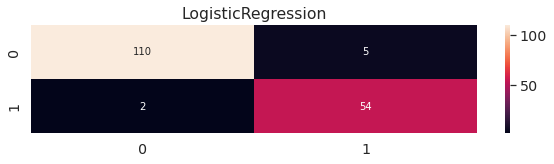



Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           B       0.94      0.97      0.95       115
           M       0.92      0.88      0.90        56

    accuracy                           0.94       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



<Figure size 432x288 with 0 Axes>

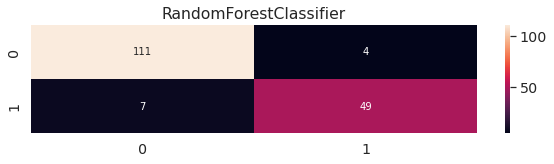



Classification Report of 'DecisionTreeClassifier '

              precision    recall  f1-score   support

           B       0.93      0.90      0.91       115
           M       0.80      0.86      0.83        56

    accuracy                           0.88       171
   macro avg       0.86      0.88      0.87       171
weighted avg       0.89      0.88      0.88       171



<Figure size 432x288 with 0 Axes>

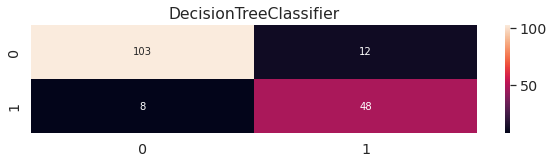



Classification Report of 'SVC '

              precision    recall  f1-score   support

           B       0.97      0.97      0.97       115
           M       0.95      0.95      0.95        56

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



<Figure size 432x288 with 0 Axes>

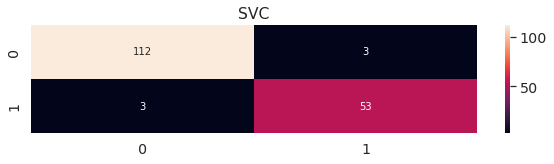

<Figure size 432x288 with 0 Axes>

In [23]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]
index = 0

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    
    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    
    print("\n\nClassification Report of '"+ str(name), "'\n")
    
    print(classification_report(y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    
    # For displaying Matrixes
    confusion_matrixs.append(confusion_matrix(y_test, predictions))
    
    plt.figure(figsize=(10, 2))
    plt.title(name)
    plt.xlabel("False Positive")
    plt.ylabel("True Positive")
    cm = confusion_matrixs[index]
    cm_metrix_graph(cm) # Call the Confusion matrix Graph function
    plt.tight_layout(pad=False)
    index += 1
            
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)

In [24]:
df_pred

,model_name,score,accuracy_score,accuracy_percentage
0,LogisticRegression,0.934673,0.959064,95.91%
1,RandomForestClassifier,0.994975,0.935673,93.57%
2,DecisionTreeClassifier,1.000000,0.883041,88.30%
3,SVC,0.949749,0.964912,96.49%


In [25]:
df_pred.sort_values('score', ascending=True)

,model_name,score,accuracy_score,accuracy_percentage
0,LogisticRegression,0.934673,0.959064,95.91%
3,SVC,0.949749,0.964912,96.49%
1,RandomForestClassifier,0.994975,0.935673,93.57%
2,DecisionTreeClassifier,1.000000,0.883041,88.30%


In [26]:
# define a function for cross validation scoring of multiple models, rather than 
# doing it on a per model basis.

def cross_val_scoring(model):
    
#     (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    
    model.fit(df[prediction_feature], df[targeted_feature])
    
    # score = model.score(X_train, y_train)    
    
    predictions = model.predict(df[prediction_feature])    
    accuracy = accuracy_score(predictions, df[targeted_feature])
    print("\nFull-Data Accuracy:", round(accuracy, 2))
    print("Cross Validation Score of'"+ str(name), "'\n")
    
    
    # Initialize K folds.
    kFold = KFold(n_splits=5) # define 5 different data folds
    
    err = []
    
    for train_index, test_index in kFold.split(df):

        # Data Spliting via fold indexes
        X_train = df[prediction_feature].iloc[train_index, :] # train_index = rows and all columns for Prediction_features
        y_train = df[targeted_feature].iloc[train_index] # all targeted features trains
        
        X_test = df[prediction_feature].iloc[test_index, :] # testing all rows and cols
        y_test = df[targeted_feature].iloc[test_index] # all targeted tests
        
        # and once again, model fitting
        model.fit(X_train, y_train)

        err.append(model.score(X_train, y_train))
        
        print("Score:", round(np.mean(err),  2) )

In [27]:
# let's call the function to determine cross validation by mean for our model predictions

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    cross_val_scoring(model)


Full-Data Accuracy: 0.9
Cross Validation Score of'LogisticRegression '

Score: 0.92
Score: 0.91
Score: 0.9
Score: 0.9
Score: 0.9

Full-Data Accuracy: 0.99
Cross Validation Score of'RandomForestClassifier '

Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0

Full-Data Accuracy: 1.0
Cross Validation Score of'DecisionTreeClassifier '

Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0

Full-Data Accuracy: 0.9
Cross Validation Score of'SVC '

Score: 0.92
Score: 0.91
Score: 0.9
Score: 0.9
Score: 0.9


We might be able to determine that on the cases where some of our models are returning a perfect score, that some overfitting is occurring.

<a id='fine_tuning'></a>
# 6. Fine tuning our Machine learning models
---
We can still fine tune some of our models scores by using GridSearchCV which implements both a "fit" and "score" methods. There are other methods that are implemented depending on the estimator that we select, such as: "predict", "predict_proba", "decision_function", "transform" and "inverse_transform".

The parameters of the estimator that used to apply these methods are optimized by cross-validated grid search over a (aptly called) parameter grid.

In [28]:
# Let's Implement Grid Search Algorithm

# Pick the model
model = DecisionTreeClassifier()

# Tuning Params
param_grid = {'max_features': ['sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10) # For 10 Cross-Validation

gsc.fit(X_train, y_train) # Model Fitting

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estimator is ")
print(gsc.best_estimator_)

print("\n Best Parameters are")
print(gsc.best_params_)


 Best Score is 
0.9094871794871795

 Best Estimator is 
DecisionTreeClassifier(max_features='log2', min_samples_leaf=7,
                       min_samples_split=10)

 Best Parameters are
{'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 10}


This is markdown

In [29]:
# Let's apply the same criteria to a different model
model = KNeighborsClassifier()


# Tuning Params
param_grid = {
    'n_neighbors': list(range(1, 30)),
    'leaf_size': list(range(1,30)),
    'weights': [ 'distance', 'uniform' ]
}


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10)

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best EStimator is ")
print(gsc.best_estimator_)

print("\n Best Parameters are")
print(gsc.best_params_)


 Best Score is 
0.9298076923076923

 Best EStimator is 
KNeighborsClassifier(leaf_size=1, n_neighbors=13, weights='distance')

 Best Parameters are
{'leaf_size': 1, 'n_neighbors': 13, 'weights': 'distance'}


In [30]:
# Let's apply the same criteria now to SVC

model = SVC()


# Tuning Params
param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              }
]


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10) # 10 Cross Validation

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estimator is ")
print(gsc.best_estimator_)

print("\n Best Parameters are")
print(gsc.best_params_)


 Best Score is 
0.9247435897435897

 Best Estimator is 
SVC(C=1000, gamma=0.0001)

 Best Parameters are
{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [ ]:
# Finally, let's repeat for random forest
# warning: running this cell takes a long time

model = RandomForestClassifier()


# Tuning Params
random_grid = {'bootstrap': [True, False],
 'max_depth': [40, 50, None], # 10, 20, 30, 60, 70, 100,
 'max_features': ['log2', 'sqrt'],
 'min_samples_leaf': [1, 2], # , 4
 'min_samples_split': [2, 5], # , 10
 'n_estimators': [200, 400]} # , 600, 800, 1000, 1200, 1400, 1600, 1800, 2000

# Implement GridSearchCV
gsc = GridSearchCV(model, random_grid, cv=10) # 10 Cross Validation

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estimator is ")
print(gsc.best_estimator_)

print("\n Best Parameters are")
print(gsc.best_params_)